## Introduction to Neural Inverse Design of Nanostructures (NIDN)

### TODO

In [3]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../")

import nidn

16:18:14|NIDN-INFO| Initialized NIDN for cpu
16:18:14|NIDN-INFO| Using double precision


## Choosing your design target

### TODO (some filter spectrum?

### Reference to Running_TRCWA notebook

### Mention of nidn.get_frequency_points(cfg) to get target frequencies

Physical frequencies are:
[1.00000000e-05 8.23533088e-06 6.78206747e-06 5.58525697e-06
 4.59964392e-06 3.78795896e-06 3.11950954e-06 2.56901933e-06
 2.11567242e-06 1.74232624e-06 1.43486331e-06 1.18165741e-06
 9.73133979e-07 8.01408031e-07 6.59986031e-07 5.43520334e-07
 4.47606979e-07 3.68619158e-07 3.03570073e-07 2.50000000e-07]


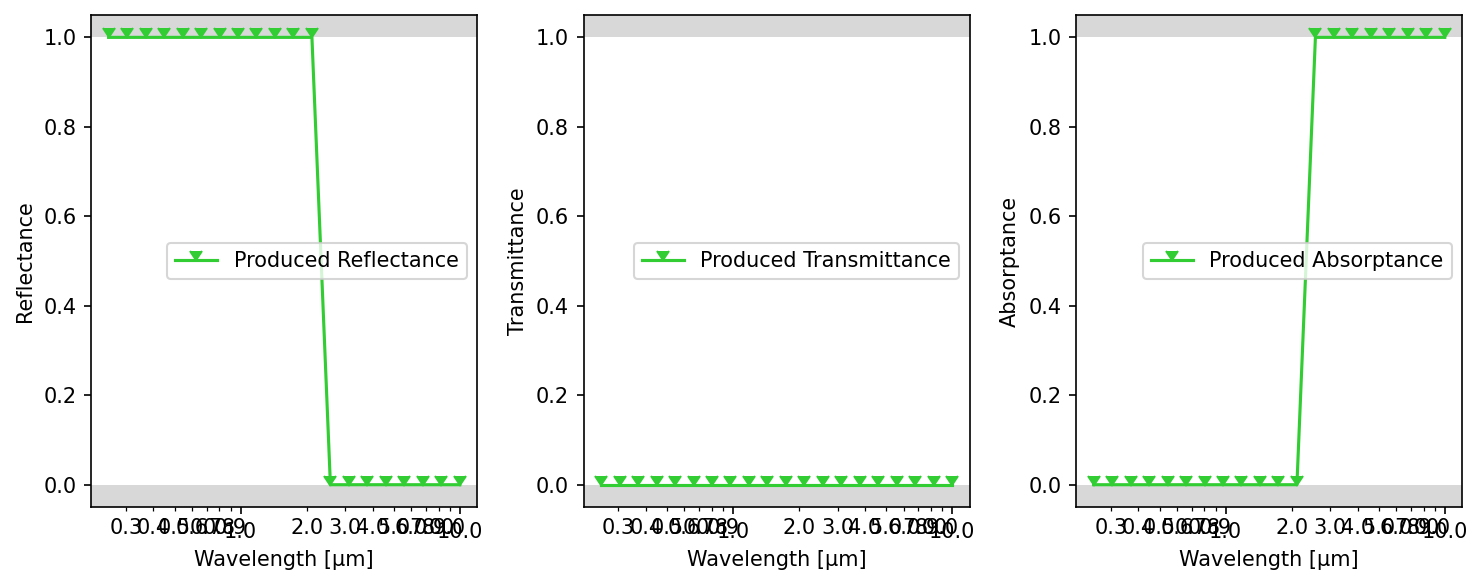

In [36]:
cfg = nidn.load_default_cfg() # Load default cfg as starting point

cfg.N_freq = 20               # Let's investigate 20 frequency points
cfg.target_reflectance_spectrum =   [0.0]*8 + [1.0]*12
cfg.target_transmittance_spectrum = [0.0]*20

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_freqs, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical frequencies are:")
print(physical_freqs)

## Core settings in NIDN and available layers

TODO: Link to doc page where all config parameters are explained.

### TRCWA and its layers

#### Uniform Layers

#### Heterogeneous Layers

### Neural Inverse Design

#### Our inverse design setup maybe figure from website?

#### Direct epsilon estimation (regression)

#### Utilizing real materials (classification)
TODO: Mention problem of differentiability of argmax

TODO: Material collection

### Example 1 - Five uniform layers with unbound epsilon

In [37]:
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 8 # Choose number of layers
cfg.type = "regression" # Choose type as described above
cfg.iterations = 2000 # Set number of training iterations (that is forward model evaluations) to perform

In [38]:
#Show all used settings
nidn.print_cfg(cfg)

seed                   : 42             |model_type             : siren          |iterations             : 2000           |
learning_rate          : 6.5e-05        |type                   : regression     |reg_loss_weight        : 0.05           |
use_regularization_loss: 1              |L                      : 0.5            |absorption_loss        : 0              |
n_neurons              : 100            |hidden_layers          : 9              |encoding_dim           : 4              |
siren_omega            : 30.0           |add_noise              : 0              |noise_scale            : 0.001          |
eps_oversampling       : 1              |real_min_eps           : 0.001          |real_max_eps           : 25.0           |
imag_min_eps           : 0.0            |imag_max_eps           : 5.0            |Nx                     : 1              |
Ny                     : 1              |N_layers               : 8              |
TRCWA_L_grid: [[0.1, 0.0], [0.0, 0.1]]
TRCWA_NG  

In [39]:
nidn.run_training(cfg);

16:30:58|NIDN-INFO| ###  New Best=0.3684 with SpectrumLoss=0.3684 ### L1=0.3590
16:30:58|NIDN-INFO| It=0     Loss=0.3684   |  weighted_avg=0.3684  |  SpectrumLoss=0.3684 | L1=0.3590
16:30:58|NIDN-INFO| ###  New Best=0.3669 with SpectrumLoss=0.3669 ### L1=0.3565
16:30:59|NIDN-INFO| ###  New Best=0.3651 with SpectrumLoss=0.3651 ### L1=0.3536
16:30:59|NIDN-INFO| ###  New Best=0.3634 with SpectrumLoss=0.3634 ### L1=0.3509
16:30:59|NIDN-INFO| ###  New Best=0.3618 with SpectrumLoss=0.3618 ### L1=0.3486
16:31:00|NIDN-INFO| ###  New Best=0.3605 with SpectrumLoss=0.3605 ### L1=0.3466
16:31:00|NIDN-INFO| It=5     Loss=0.3605   |  weighted_avg=0.3644  |  SpectrumLoss=0.3605 | L1=0.3466
16:31:00|NIDN-INFO| ###  New Best=0.3593 with SpectrumLoss=0.3593 ### L1=0.3448
16:31:01|NIDN-INFO| ###  New Best=0.3583 with SpectrumLoss=0.3583 ### L1=0.3433
16:31:01|NIDN-INFO| ###  New Best=0.3573 with SpectrumLoss=0.3573 ### L1=0.3419
16:31:01|NIDN-INFO| ###  New Best=0.3564 with SpectrumLoss=0.3564 ### L1=0.3

16:31:23|NIDN-INFO| ###  New Best=0.3334 with SpectrumLoss=0.3334 ### L1=0.3073
16:31:24|NIDN-INFO| ###  New Best=0.3330 with SpectrumLoss=0.3330 ### L1=0.3067
16:31:24|NIDN-INFO| ###  New Best=0.3326 with SpectrumLoss=0.3326 ### L1=0.3062
16:31:25|NIDN-INFO| ###  New Best=0.3322 with SpectrumLoss=0.3322 ### L1=0.3056
16:31:25|NIDN-INFO| It=65    Loss=0.3322   |  weighted_avg=0.3358  |  SpectrumLoss=0.3322 | L1=0.3056
16:31:25|NIDN-INFO| ###  New Best=0.3318 with SpectrumLoss=0.3318 ### L1=0.3051
16:31:25|NIDN-INFO| ###  New Best=0.3313 with SpectrumLoss=0.3313 ### L1=0.3046
16:31:26|NIDN-INFO| ###  New Best=0.3309 with SpectrumLoss=0.3309 ### L1=0.3041
16:31:26|NIDN-INFO| ###  New Best=0.3305 with SpectrumLoss=0.3305 ### L1=0.3033
16:31:27|NIDN-INFO| ###  New Best=0.3300 with SpectrumLoss=0.3300 ### L1=0.3027
16:31:27|NIDN-INFO| It=70    Loss=0.3300   |  weighted_avg=0.3339  |  SpectrumLoss=0.3300 | L1=0.3027
16:31:27|NIDN-INFO| ###  New Best=0.3296 with SpectrumLoss=0.3296 ### L1=0.3

16:31:49|NIDN-INFO| It=125   Loss=0.3003   |  weighted_avg=0.3061  |  SpectrumLoss=0.3003 | L1=0.2696
16:31:49|NIDN-INFO| ###  New Best=0.2996 with SpectrumLoss=0.2996 ### L1=0.2689
16:31:50|NIDN-INFO| ###  New Best=0.2989 with SpectrumLoss=0.2989 ### L1=0.2682
16:31:50|NIDN-INFO| ###  New Best=0.2983 with SpectrumLoss=0.2983 ### L1=0.2676
16:31:50|NIDN-INFO| ###  New Best=0.2976 with SpectrumLoss=0.2976 ### L1=0.2669
16:31:51|NIDN-INFO| ###  New Best=0.2971 with SpectrumLoss=0.2971 ### L1=0.2663
16:31:51|NIDN-INFO| It=130   Loss=0.2971   |  weighted_avg=0.3030  |  SpectrumLoss=0.2971 | L1=0.2663
16:31:51|NIDN-INFO| ###  New Best=0.2964 with SpectrumLoss=0.2964 ### L1=0.2656
16:31:52|NIDN-INFO| ###  New Best=0.2958 with SpectrumLoss=0.2958 ### L1=0.2650
16:31:52|NIDN-INFO| ###  New Best=0.2952 with SpectrumLoss=0.2952 ### L1=0.2644
16:31:52|NIDN-INFO| ###  New Best=0.2946 with SpectrumLoss=0.2946 ### L1=0.2639
16:31:53|NIDN-INFO| ###  New Best=0.2940 with SpectrumLoss=0.2940 ### L1=0.2

16:32:34|NIDN-INFO| ###  New Best=0.2716 with SpectrumLoss=0.2716 ### L1=0.2455
16:32:35|NIDN-INFO| ###  New Best=0.2710 with SpectrumLoss=0.2710 ### L1=0.2457
16:32:35|NIDN-INFO| It=240   Loss=0.2710   |  weighted_avg=0.2773  |  SpectrumLoss=0.2710 | L1=0.2457
16:32:35|NIDN-INFO| ###  New Best=0.2703 with SpectrumLoss=0.2703 ### L1=0.2455
16:32:35|NIDN-INFO| ###  New Best=0.2701 with SpectrumLoss=0.2701 ### L1=0.2453
16:32:36|NIDN-INFO| ###  New Best=0.2689 with SpectrumLoss=0.2689 ### L1=0.2446
16:32:36|NIDN-INFO| ###  New Best=0.2685 with SpectrumLoss=0.2685 ### L1=0.2442
16:32:36|NIDN-INFO| ###  New Best=0.2684 with SpectrumLoss=0.2684 ### L1=0.2439
16:32:36|NIDN-INFO| It=245   Loss=0.2684   |  weighted_avg=0.2739  |  SpectrumLoss=0.2684 | L1=0.2439
16:32:37|NIDN-INFO| ###  New Best=0.2674 with SpectrumLoss=0.2674 ### L1=0.2436
16:32:37|NIDN-INFO| ###  New Best=0.2669 with SpectrumLoss=0.2669 ### L1=0.2431
16:32:38|NIDN-INFO| ###  New Best=0.2667 with SpectrumLoss=0.2667 ### L1=0.2

16:33:12|NIDN-INFO| ###  New Best=0.2369 with SpectrumLoss=0.2369 ### L1=0.2080
16:33:13|NIDN-INFO| ###  New Best=0.2369 with SpectrumLoss=0.2369 ### L1=0.2067
16:33:13|NIDN-INFO| It=340   Loss=0.2375   |  weighted_avg=0.2410  |  SpectrumLoss=0.2375 | L1=0.2076
16:33:14|NIDN-INFO| ###  New Best=0.2355 with SpectrumLoss=0.2355 ### L1=0.2064
16:33:15|NIDN-INFO| ###  New Best=0.2339 with SpectrumLoss=0.2339 ### L1=0.2057
16:33:15|NIDN-INFO| ###  New Best=0.2326 with SpectrumLoss=0.2326 ### L1=0.2047
16:33:15|NIDN-INFO| It=345   Loss=0.2326   |  weighted_avg=0.2384  |  SpectrumLoss=0.2326 | L1=0.2047
16:33:17|NIDN-INFO| ###  New Best=0.2317 with SpectrumLoss=0.2317 ### L1=0.2042
16:33:17|NIDN-INFO| ###  New Best=0.2311 with SpectrumLoss=0.2311 ### L1=0.2030
16:33:17|NIDN-INFO| It=350   Loss=0.2311   |  weighted_avg=0.2361  |  SpectrumLoss=0.2311 | L1=0.2030
16:33:19|NIDN-INFO| ###  New Best=0.2307 with SpectrumLoss=0.2307 ### L1=0.2013
16:33:19|NIDN-INFO| It=355   Loss=0.2307   |  weighted

16:34:33|NIDN-INFO| ###  New Best=0.2040 with SpectrumLoss=0.2040 ### L1=0.1607
16:34:34|NIDN-INFO| It=560   Loss=0.2043   |  weighted_avg=0.2112  |  SpectrumLoss=0.2043 | L1=0.1608
16:34:36|NIDN-INFO| It=565   Loss=0.2463   |  weighted_avg=0.2148  |  SpectrumLoss=0.2463 | L1=0.2051
16:34:38|NIDN-INFO| It=570   Loss=0.2436   |  weighted_avg=0.2225  |  SpectrumLoss=0.2436 | L1=0.1998
16:34:39|NIDN-INFO| It=575   Loss=0.2375   |  weighted_avg=0.2296  |  SpectrumLoss=0.2375 | L1=0.1829
16:34:41|NIDN-INFO| It=580   Loss=0.2128   |  weighted_avg=0.2321  |  SpectrumLoss=0.2128 | L1=0.1670
16:34:43|NIDN-INFO| It=585   Loss=0.2295   |  weighted_avg=0.2302  |  SpectrumLoss=0.2295 | L1=0.2069
16:34:45|NIDN-INFO| It=590   Loss=0.2113   |  weighted_avg=0.2245  |  SpectrumLoss=0.2113 | L1=0.1783
16:34:47|NIDN-INFO| It=595   Loss=0.2128   |  weighted_avg=0.2195  |  SpectrumLoss=0.2128 | L1=0.1753
16:34:48|NIDN-INFO| ###  New Best=0.1920 with SpectrumLoss=0.1920 ### L1=0.1507
16:34:48|NIDN-INFO| ### 

Epoch   802: reducing learning rate of group 0 to 4.8750e-05.


16:36:02|NIDN-INFO| It=805   Loss=0.3250   |  weighted_avg=0.2873  |  SpectrumLoss=0.3250 | L1=0.3196
16:36:04|NIDN-INFO| It=810   Loss=0.3044   |  weighted_avg=0.2969  |  SpectrumLoss=0.3044 | L1=0.2934
16:36:06|NIDN-INFO| It=815   Loss=0.2967   |  weighted_avg=0.3036  |  SpectrumLoss=0.2967 | L1=0.2698
16:36:08|NIDN-INFO| It=820   Loss=0.2985   |  weighted_avg=0.3096  |  SpectrumLoss=0.2985 | L1=0.2760
16:36:10|NIDN-INFO| It=825   Loss=0.2728   |  weighted_avg=0.3001  |  SpectrumLoss=0.2728 | L1=0.2672
16:36:11|NIDN-INFO| It=830   Loss=0.2793   |  weighted_avg=0.2913  |  SpectrumLoss=0.2793 | L1=0.2474
16:36:13|NIDN-INFO| It=835   Loss=0.2572   |  weighted_avg=0.2834  |  SpectrumLoss=0.2572 | L1=0.2325
16:36:15|NIDN-INFO| It=840   Loss=0.2537   |  weighted_avg=0.2778  |  SpectrumLoss=0.2537 | L1=0.2269
16:36:17|NIDN-INFO| It=845   Loss=0.2496   |  weighted_avg=0.2703  |  SpectrumLoss=0.2496 | L1=0.2291
16:36:19|NIDN-INFO| It=850   Loss=0.2650   |  weighted_avg=0.2618  |  SpectrumLoss

Epoch  1003: reducing learning rate of group 0 to 3.6562e-05.


16:37:14|NIDN-INFO| It=1005  Loss=0.2204   |  weighted_avg=0.2268  |  SpectrumLoss=0.2204 | L1=0.1904
16:37:16|NIDN-INFO| It=1010  Loss=0.2164   |  weighted_avg=0.2227  |  SpectrumLoss=0.2164 | L1=0.1860
16:37:18|NIDN-INFO| It=1015  Loss=0.2140   |  weighted_avg=0.2195  |  SpectrumLoss=0.2140 | L1=0.1857
16:37:20|NIDN-INFO| It=1020  Loss=0.2098   |  weighted_avg=0.2157  |  SpectrumLoss=0.2098 | L1=0.1785
16:37:22|NIDN-INFO| It=1025  Loss=0.2065   |  weighted_avg=0.2121  |  SpectrumLoss=0.2065 | L1=0.1762
16:37:23|NIDN-INFO| It=1030  Loss=0.2071   |  weighted_avg=0.2091  |  SpectrumLoss=0.2071 | L1=0.1747
16:37:25|NIDN-INFO| It=1035  Loss=0.2027   |  weighted_avg=0.2065  |  SpectrumLoss=0.2027 | L1=0.1724
16:37:27|NIDN-INFO| It=1040  Loss=0.2037   |  weighted_avg=0.2048  |  SpectrumLoss=0.2037 | L1=0.1723
16:37:29|NIDN-INFO| It=1045  Loss=0.2016   |  weighted_avg=0.2035  |  SpectrumLoss=0.2016 | L1=0.1729
16:37:31|NIDN-INFO| It=1050  Loss=0.2004   |  weighted_avg=0.2029  |  SpectrumLoss

16:38:36|NIDN-INFO| It=1230  Loss=0.1851   |  weighted_avg=0.1853  |  SpectrumLoss=0.1851 | L1=0.1565
16:38:37|NIDN-INFO| ###  New Best=0.1842 with SpectrumLoss=0.1842 ### L1=0.1562
16:38:37|NIDN-INFO| ###  New Best=0.1836 with SpectrumLoss=0.1836 ### L1=0.1561
16:38:38|NIDN-INFO| It=1235  Loss=0.1841   |  weighted_avg=0.1849  |  SpectrumLoss=0.1841 | L1=0.1561
16:38:38|NIDN-INFO| ###  New Best=0.1834 with SpectrumLoss=0.1834 ### L1=0.1560
16:38:39|NIDN-INFO| ###  New Best=0.1833 with SpectrumLoss=0.1833 ### L1=0.1559
16:38:40|NIDN-INFO| ###  New Best=0.1831 with SpectrumLoss=0.1831 ### L1=0.1558
16:38:40|NIDN-INFO| It=1240  Loss=0.1831   |  weighted_avg=0.1844  |  SpectrumLoss=0.1831 | L1=0.1558
16:38:41|NIDN-INFO| ###  New Best=0.1830 with SpectrumLoss=0.1830 ### L1=0.1556
16:38:41|NIDN-INFO| ###  New Best=0.1826 with SpectrumLoss=0.1826 ### L1=0.1556
16:38:41|NIDN-INFO| It=1245  Loss=0.1828   |  weighted_avg=0.1839  |  SpectrumLoss=0.1828 | L1=0.1555
16:38:43|NIDN-INFO| It=1250  Los

16:39:35|NIDN-INFO| ###  New Best=0.1749 with SpectrumLoss=0.1749 ### L1=0.1493
16:39:35|NIDN-INFO| It=1395  Loss=0.1749   |  weighted_avg=0.1756  |  SpectrumLoss=0.1749 | L1=0.1493
16:39:37|NIDN-INFO| ###  New Best=0.1748 with SpectrumLoss=0.1748 ### L1=0.1492
16:39:37|NIDN-INFO| ###  New Best=0.1747 with SpectrumLoss=0.1747 ### L1=0.1491
16:39:37|NIDN-INFO| It=1400  Loss=0.1747   |  weighted_avg=0.1755  |  SpectrumLoss=0.1747 | L1=0.1491
16:39:38|NIDN-INFO| ###  New Best=0.1744 with SpectrumLoss=0.1744 ### L1=0.1491
16:39:39|NIDN-INFO| It=1405  Loss=0.1747   |  weighted_avg=0.1752  |  SpectrumLoss=0.1747 | L1=0.1490
16:39:41|NIDN-INFO| It=1410  Loss=0.1749   |  weighted_avg=0.1751  |  SpectrumLoss=0.1749 | L1=0.1489
16:39:42|NIDN-INFO| ###  New Best=0.1741 with SpectrumLoss=0.1741 ### L1=0.1487
16:39:43|NIDN-INFO| It=1415  Loss=0.1747   |  weighted_avg=0.1749  |  SpectrumLoss=0.1747 | L1=0.1487
16:39:44|NIDN-INFO| ###  New Best=0.1739 with SpectrumLoss=0.1739 ### L1=0.1486
16:39:44|N

16:40:46|NIDN-INFO| It=1590  Loss=0.1696   |  weighted_avg=0.1697  |  SpectrumLoss=0.1696 | L1=0.1442
16:40:47|NIDN-INFO| ###  New Best=0.1685 with SpectrumLoss=0.1685 ### L1=0.1439
16:40:48|NIDN-INFO| It=1595  Loss=0.1698   |  weighted_avg=0.1698  |  SpectrumLoss=0.1698 | L1=0.1440
16:40:49|NIDN-INFO| ###  New Best=0.1683 with SpectrumLoss=0.1683 ### L1=0.1438
16:40:49|NIDN-INFO| It=1600  Loss=0.1687   |  weighted_avg=0.1694  |  SpectrumLoss=0.1687 | L1=0.1438
16:40:51|NIDN-INFO| ###  New Best=0.1683 with SpectrumLoss=0.1683 ### L1=0.1437
16:40:51|NIDN-INFO| ###  New Best=0.1682 with SpectrumLoss=0.1682 ### L1=0.1436
16:40:51|NIDN-INFO| It=1605  Loss=0.1682   |  weighted_avg=0.1691  |  SpectrumLoss=0.1682 | L1=0.1436
16:40:52|NIDN-INFO| ###  New Best=0.1682 with SpectrumLoss=0.1682 ### L1=0.1436
16:40:53|NIDN-INFO| ###  New Best=0.1681 with SpectrumLoss=0.1681 ### L1=0.1435
16:40:53|NIDN-INFO| ###  New Best=0.1675 with SpectrumLoss=0.1675 ### L1=0.1435
16:40:53|NIDN-INFO| It=1610  Los

16:41:54|NIDN-INFO| It=1780  Loss=0.1639   |  weighted_avg=0.1640  |  SpectrumLoss=0.1639 | L1=0.1396
16:41:56|NIDN-INFO| It=1785  Loss=0.1638   |  weighted_avg=0.1639  |  SpectrumLoss=0.1638 | L1=0.1395
16:41:58|NIDN-INFO| ###  New Best=0.1634 with SpectrumLoss=0.1634 ### L1=0.1394
16:41:58|NIDN-INFO| It=1790  Loss=0.1634   |  weighted_avg=0.1640  |  SpectrumLoss=0.1634 | L1=0.1394
16:42:00|NIDN-INFO| It=1795  Loss=0.1644   |  weighted_avg=0.1641  |  SpectrumLoss=0.1644 | L1=0.1394
16:42:01|NIDN-INFO| ###  New Best=0.1628 with SpectrumLoss=0.1628 ### L1=0.1393
16:42:02|NIDN-INFO| It=1800  Loss=0.1635   |  weighted_avg=0.1640  |  SpectrumLoss=0.1635 | L1=0.1393
16:42:03|NIDN-INFO| It=1805  Loss=0.1633   |  weighted_avg=0.1638  |  SpectrumLoss=0.1633 | L1=0.1392
16:42:04|NIDN-INFO| ###  New Best=0.1627 with SpectrumLoss=0.1627 ### L1=0.1392
16:42:05|NIDN-INFO| It=1810  Loss=0.1634   |  weighted_avg=0.1636  |  SpectrumLoss=0.1634 | L1=0.1392
16:42:07|NIDN-INFO| It=1815  Loss=0.1635   |  

### Result interpretation
#### Loss plot
TODO Explain

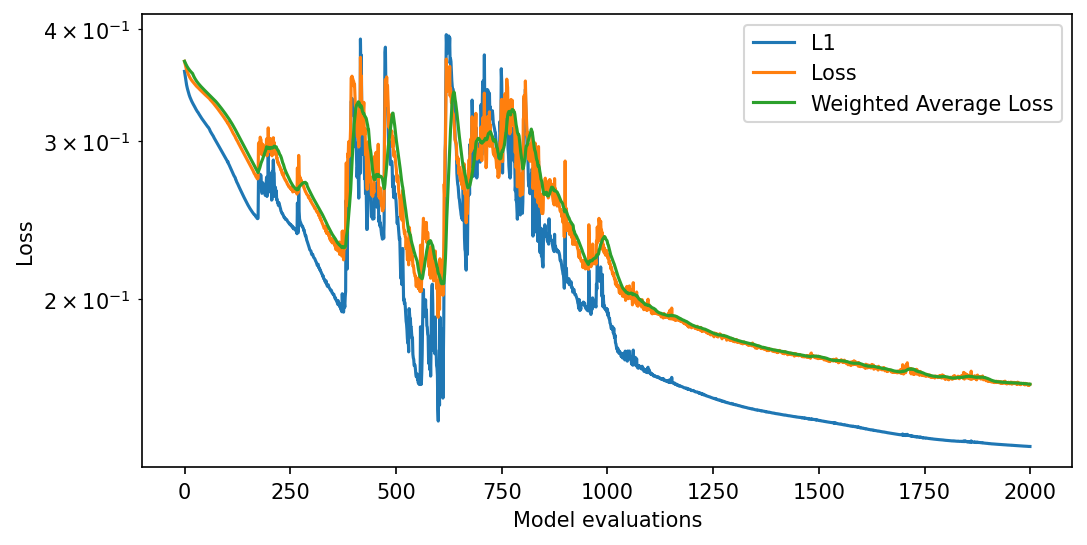

In [40]:
nidn.plot_losses(cfg)

#### Spectra plot
TODO Explain

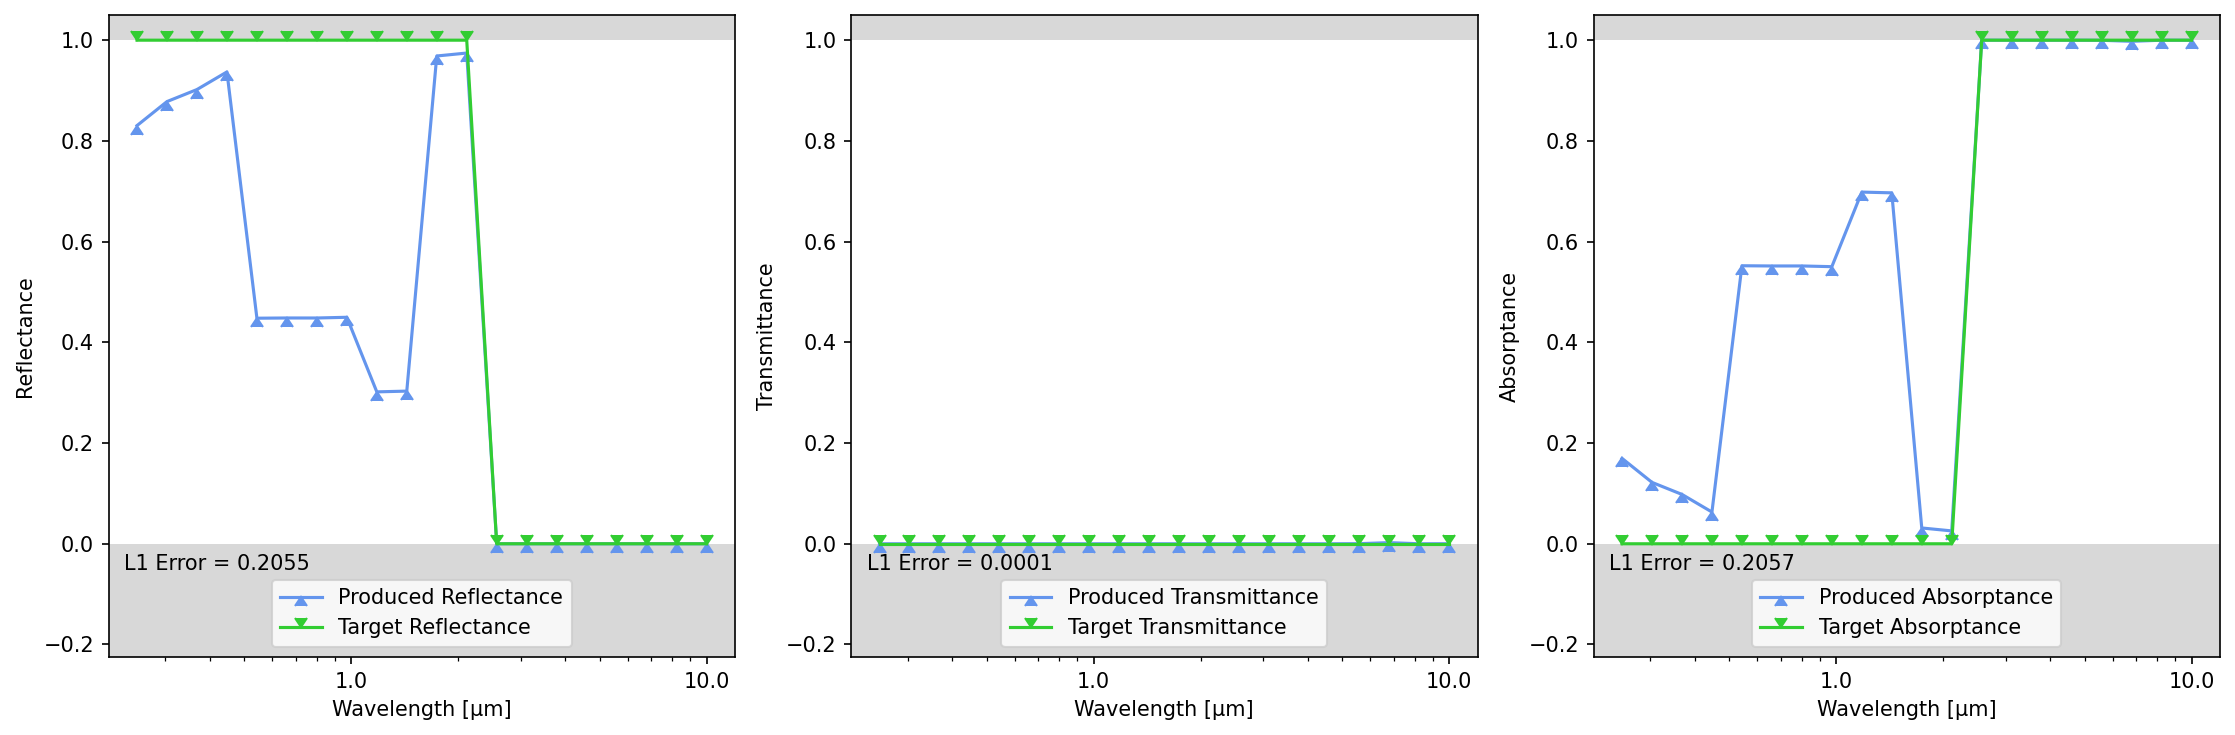

In [41]:
nidn.plot_spectra(cfg)

#### Absolute grid values plot
TODO Explain
TODO Explain layers

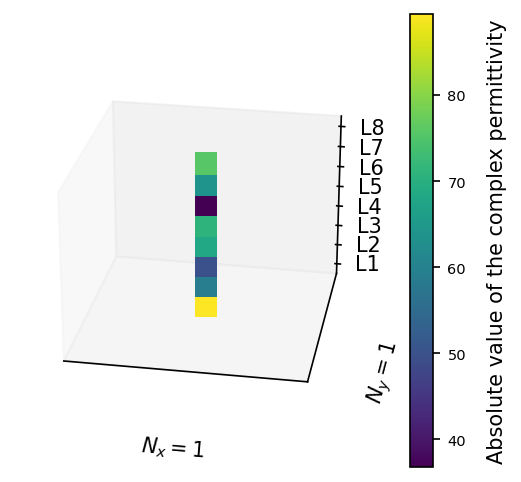

In [42]:
nidn.plot_model_grid(cfg)

#### Epsilon vs frequency and real materials
TODO Explain

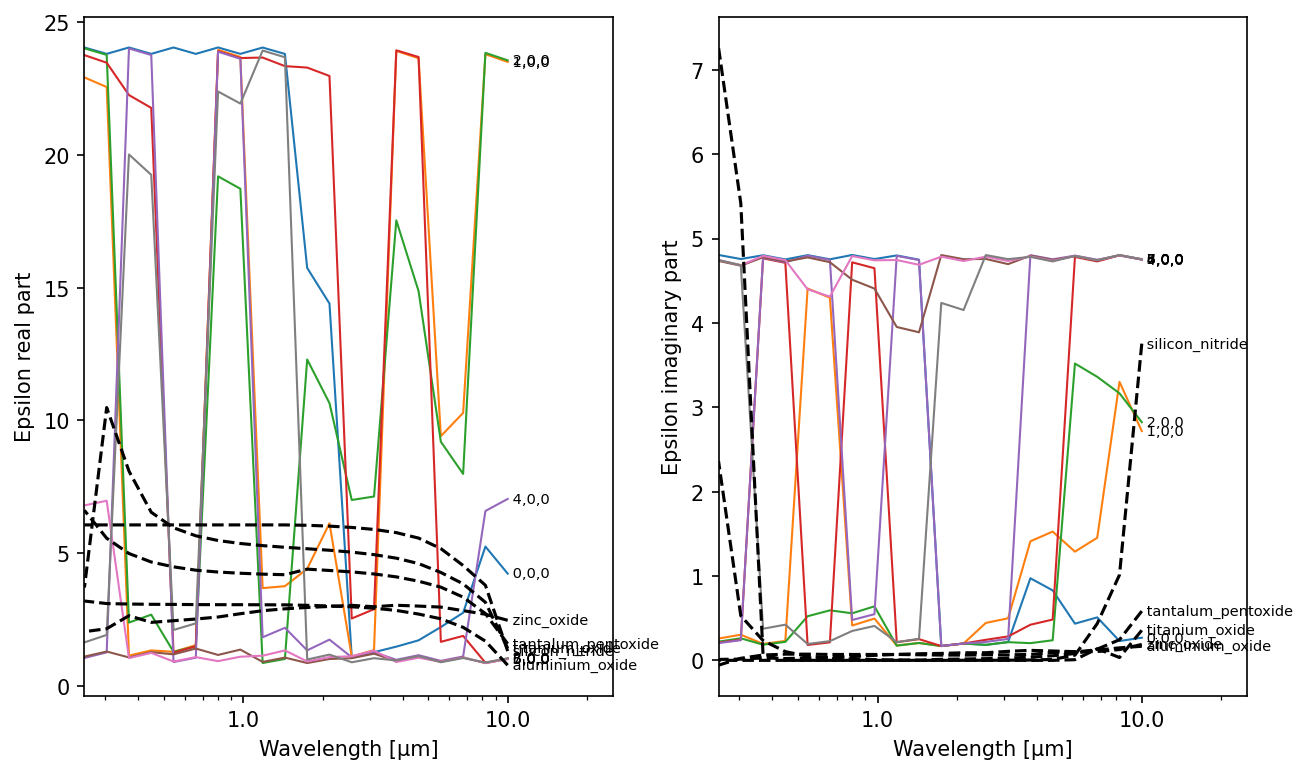

In [35]:
nidn.plot_eps_per_point(cfg)

### Example 2 - 2 patterned layers with unbound epsilon

TODO

In [ ]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 16 # Set layer size  to 16x16 (each of the grid points has its own epsilon now)
cfg.Ny = 16
cfg.eps_oversampling = 4
cfg.N_layers = 2 # Less layer to keep compute managable
cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 250 # Set number of training iterations (that is forward model evaluations) to perform

In [ ]:
nidn.run_training(cfg);

In [ ]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg)

### Example 3 - Patterned layer with bound epsilon

TODO

In [ ]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 16 # Set layer size  to 16x16 (each of the grid points has its own epsilon now)
cfg.Ny = 16
cfg.eps_oversampling = 8
cfg.N_layers = 2 # Less layer to keep compute managable
cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 250 # Set number of training iterations (that is forward model evaluations) to perform

In [ ]:
nidn.run_training(cfg);

#### Material ID plot
TODO

In [ ]:
nidn.plot_material_grid(cfg)

In [ ]:
# The other plots
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg)

In [ ]:
# In case you want to save results you can use this handy function
# to save it to the results folder with a current timestamp
nidn.save_run(cfg)

# You can save all available plots to a single folder using this function
nidn.save_all_plots(cfg,save_path="/results/example/")